In [65]:
%matplotlib inline
import numpy as np
from scipy.interpolate import interp2d
import matplotlib.pyplot as plt
from scipy.io import savemat

In [66]:
eta=np.load('radeta_1.7.npz')

In [67]:
eta.files

['voc_y', 'eta', 'voc_x']

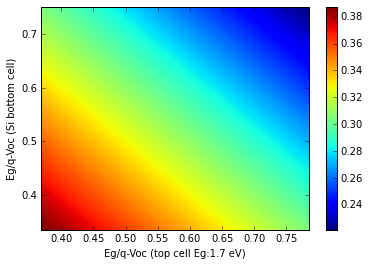

In [68]:
top_cell_bg=1.70
bot_cell_bg=1.12
top_voc=eta['voc_x']
bot_voc=eta['voc_y']
plt.pcolormesh(top_cell_bg - eta['voc_x'], bot_cell_bg - eta['voc_y'], eta['eta'])
plt.colorbar()
# plt.legend(loc="best")
plt.xlim([np.min(top_cell_bg-top_voc),np.max(top_cell_bg-top_voc)])
plt.ylim([np.min(bot_cell_bg-bot_voc),np.max(bot_cell_bg-bot_voc)])
plt.xlabel("Eg/q-Voc (top cell Eg:%s eV)"%top_cell_bg)
plt.ylabel("Eg/q-Voc (Si bottom cell)")

In [69]:
print(np.min(eta['voc_x']))
print(np.max(eta['voc_x']))

0.915130642573
1.33171591466


In [70]:
f=interp2d(eta['voc_x'],eta['voc_y'],eta['eta'])

In [71]:
test_x=np.linspace(0.4,0.7,num=10)
z=f(top_cell_bg-test_x,0.4)
print(z)

[ 0.24473995  0.25148067  0.25818717  0.26488362  0.2715655   0.27823333
  0.28486605  0.29159284  0.29831281  0.30505629]


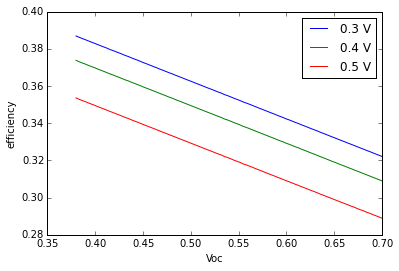

In [72]:
iii_v_offset=np.linspace(0.38,0.7,num=100)
iii_v_voc_range=top_cell_bg-iii_v_offset
# Note that the interpolation function performs sort before interploting the values
# https://github.com/scipy/scipy/pull/3565/files#r11806677
plt.plot(iii_v_offset,f(iii_v_voc_range,1.12-0.3)[::-1],hold=True,label='0.3 V')
plt.plot(iii_v_offset,f(iii_v_voc_range,1.12-0.4)[::-1],label='0.4 V')
plt.plot(iii_v_offset,f(iii_v_voc_range,1.12-0.5)[::-1],label='0.5 V')
plt.xlabel("Voc")
plt.ylabel("efficiency")
plt.legend()

In [73]:
savemat('2jresult.mat',{'iii_v_offset':iii_v_offset,'data1':f(iii_v_voc_range,1.12-0.3)[::-1],
                        'data2':f(iii_v_voc_range,1.12-0.4)[::-1],
                        'data3':f(iii_v_voc_range,1.12-0.5)[::-1]},format='4')

### Three junction cell

In [31]:
threej_eta=np.load("mjdata_opt.npz")
threej_eta.files
top_cell_bg=1.97
mid_cell_bg=1.48

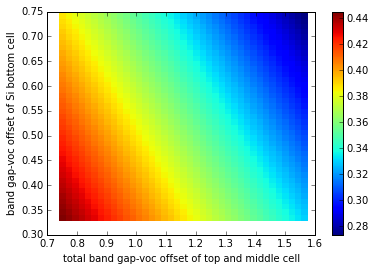

In [32]:
eta_mtx=threej_eta['eta']
iii_v_voc=threej_eta['voc_x']+threej_eta['voc_y']
si_voc=threej_eta['voc_z']
plt.pcolormesh((top_cell_bg+mid_cell_bg)-iii_v_voc,1.12-si_voc,eta_mtx)
plt.ylabel("band gap-voc offset of Si bottom cell")
plt.xlabel("total band gap-voc offset of top and middle cell")
plt.colorbar()

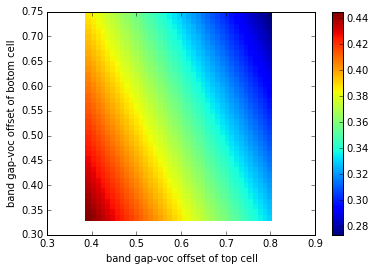

In [33]:
eta_mtx=threej_eta['eta']
iii_v_voc_sum=threej_eta['voc_x']+threej_eta['voc_y']
si_voc=threej_eta['voc_z']
plt.pcolormesh(top_cell_bg-threej_eta['voc_x'],1.12-si_voc,eta_mtx)
plt.ylabel("band gap-voc offset of botom cell")
plt.xlabel("band gap-voc offset of top cell")
plt.colorbar()

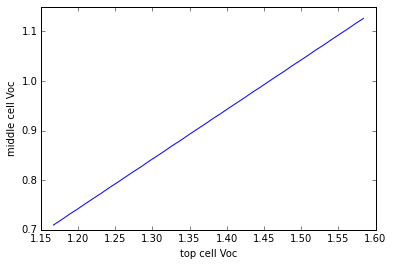

In [34]:
plt.plot(threej_eta['voc_x'][0,:],threej_eta['voc_y'][0,:])
plt.xlabel('top cell Voc')
plt.ylabel('middle cell Voc')

#### Investigate the relation between the band-gap-voc offset of top and middle cell, at same radiative efficiency

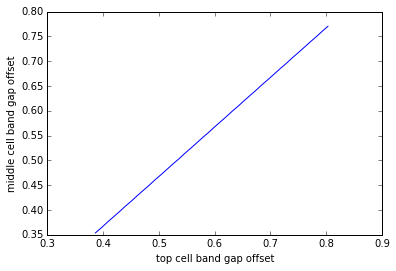

In [35]:
plt.plot(top_cell_bg-threej_eta['voc_x'][0,:],mid_cell_bg-threej_eta['voc_y'][0,:])
plt.xlabel('top cell band gap offset')
plt.ylabel('middle cell band gap offset')

It looks like that the band-gap-Voc offsets do not match. Maybe we can use (top offset +mid offset)/2 instead 

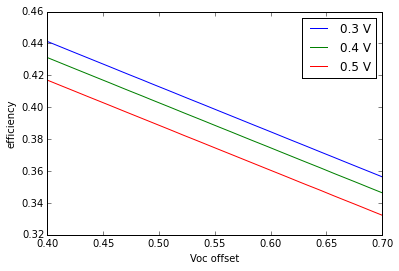

In [36]:
f2=interp2d(iii_v_voc_sum,threej_eta['voc_z'],threej_eta['eta'])

iii_v_offset=np.linspace(0.4,0.7,num=50)
iii_v_voc_range=(top_cell_bg+mid_cell_bg)-iii_v_offset*2
# Note that the interpolation function performs sort before interploting the values
# https://github.com/scipy/scipy/pull/3565/files#r11806677
plt.plot(iii_v_offset,f2(iii_v_voc_range,1.12-0.3)[::-1],hold=True,label='0.3 V')
plt.plot(iii_v_offset,f2(iii_v_voc_range,1.12-0.4)[::-1],label='0.4 V')
plt.plot(iii_v_offset,f2(iii_v_voc_range,1.12-0.5)[::-1],label='0.5 V')
plt.xlabel("Voc offset")
plt.ylabel("efficiency")
plt.legend()

In [37]:
savemat('3jresult.mat',{'iii_v_offset':iii_v_offset,'data1':f2(iii_v_voc_range,1.12-0.3)[::-1],
                        'data2':f2(iii_v_voc_range,1.12-0.4)[::-1],
                        'data3':f2(iii_v_voc_range,1.12-0.5)[::-1]},format='4')